# Multiple Layer LSTM

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
vocab_size = 10000
embedding_dim = 64
max_length = 80
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
import numpy as np


# Get the data
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])
print(padded[3])
print(testing_padded[3])

this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.
[  12    7    2  241    5   20   16    4 8776 2707 2653   52    2  358
    5    2  180   68  138 1401   17   92  203  968   15   23   

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 751,489
Trainable params: 751,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 50
history = model.fit(padded, training_labels_final, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 22s 28ms/step - loss: 0.4810 - accuracy: 0.7626 - val_loss: 0.4173 - val_accuracy: 0.8084
Epoch 2/50
782/782 [==============================] - 21s 27ms/step - loss: 0.3283 - accuracy: 0.8625 - val_loss: 0.4341 - val_accuracy: 0.8120
Epoch 3/50
782/782 [==============================] - 21s 27ms/step - loss: 0.2684 - accuracy: 0.8903 - val_loss: 0.4633 - val_accuracy: 0.7966
Epoch 4/50
782/782 [==============================] - 21s 27ms/step - loss: 0.2124 - accuracy: 0.9161 - val_loss: 0.5126 - val_accuracy: 0.7848
Epoch 5/50
782/782 [==============================] - 21s 27ms/step - loss: 0.1469 - accuracy: 0.9460 - val_loss: 0.5640 - val_accuracy: 0.7796
Epoch 6/50
782/782 [==============================] - 21s 27ms/step - loss: 0.0991 - accuracy: 0.9656 - val_loss: 0.7899 - val_accuracy: 0.7715
Epoch 7/50
782/782 [==============================] - 21s 27ms/step - loss: 0.0610 - accuracy: 0.9792 - val_loss: 0.9897 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

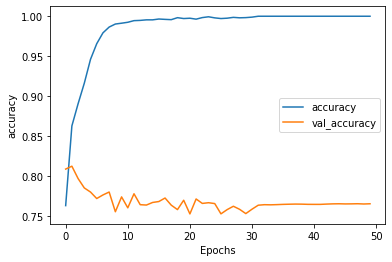

In [ ]:
plot_graphs(history, 'accuracy')

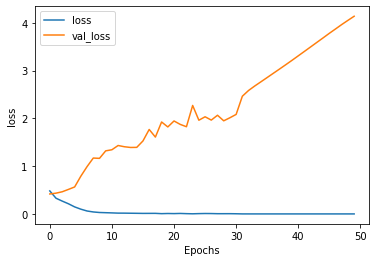

In [ ]:
plot_graphs(history, 'loss')